In [5]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import statistics

A psychologist wants to estimate the average dollar amount that a Visalia, 
CA resident would donate to a local homeless shelter. Twenty residents were 
randomly selected from the Visalia telephone directory which contains about 
30,800 names. The 20 randomly residents were contacted by telephone and asked 
how much they would be willing to donate. Their responses (in dollars) are given 
below.
30 20 15 10 10 60 20 25 20 30 10 5 50 40 20 10 10 0 20 50

a) Describe the study population.

b) Describe the population mean (𝜇) in the context of this study.

c) A volunteer group has agreed to call all 30,800 residents and ask for a donation if there 
is strong evidence to suggest that 𝜇 > 15. Test H0: 𝜇 = 15. Report t, df, p-value, and your 
decision based on 𝛼 = .05. 

d) Compute a 95% confidence interval for 𝜇 and interpret the results. 

e) A similar study is being planned for the city of San Luis Obispo. How many residents 
should be contacted to obtain a 95% confidence interval for 𝜇 that has a width of $10.00? 
Use the sample variance (the squared standard deviation) from the Visalia study as the 
planning value for the population variance. Use R or hand compute Equation 1.6.

In [6]:
sample_pop = 20
total_pop =30800
x = [30,20,15,10,10,60,20,25,20,30,10,5,50,40,20,10,10,0,20,50]
U=15
deg_fre = len(x)-1
conf_level = 15/100 #15%
a=0.05
deg_fre

19

In [7]:
data = pd.DataFrame(x)
data.rename(columns={0:"$"},inplace=True)
data 

,$
0,30
1,20
2,15
3,10
4,10
5,60
6,20
7,25
8,20
9,30


In [8]:
mean = data.mean(axis=0)
mean

$    22.75
dtype: float64

In [9]:
data.columns

Index(['$'], dtype='object')

In [31]:
#plt.scatter(x=x,y=range(20))

In [24]:
Q1=np.percentile(data["$"],25)
Q2=np.percentile(data["$"],50)
Q3=np.percentile(data["$"],75)
Q1,Q2,Q3
print("Q1 : {}\n Q2 : {}\n Q3 : {}\n Inter Qurtile range (Q3-Q1) :{}".format(Q1,Q2,Q3,Q3-Q1))

Q1 : 10.0
 Q2 : 20.0
 Q3 : 30.0
 Inter Qurtile range (Q3-Q1) :20.0


In [26]:
variance=np.var(x)
print("Virance : {}".format(variance))

Virance : 251.1875


In [11]:
stats.ttest_1samp(x,15,)

TtestResult(statistic=2.1314713093944837, pvalue=0.04632609633616785, df=19)

since alpha is 5% and statistic is 2.1314 and p-value is less then 0.05 we have to accept Null Hypothesis

In [12]:
stats.t.cdf(2.1314,19)
t_score = stats.t.ppf(0.95,19) # stat.t.ppf(alpha,df) if population stdiv not known
z_score = stats.norm.ppf(q=0.95), #stats.t.ppf(alpha,df) z value or critical vaue population stdiv known


In [13]:
stats.t.cdf(2.1314,19),t_score,z_score

(0.9768336613484317, 1.729132811521367, (1.6448536269514722,))

In [14]:
Mean = statistics.mean(x)
s_dev=statistics.stdev(x)
median=statistics.median(x)
var=statistics.variance(x)
mode=stats.mode(x,keepdims=True)
sigma = stats.t.cdf(2.1314,19)
margin_of_error = t_score*sigma
z_critical=stats.norm.ppf(q=0.96)
stdiv_err = stats.t.cdf(2.1314,19)
confidence_interval=(mean-stdiv_err,mean+stdiv_err)
t_conf_int=(mean-margin_of_error,mean+margin_of_error)
Mean,s_dev,median,var,stdiv_err,z_critical,confidence_interval,margin_of_error,sigma,t_conf_int
print("Mean: {} \n standerd deviation : {} \n median : {} \n Mode : {} \n Variance : {} \n Standeviation Error : {} \n Z Critical {} \n Confidence Interval \n Margin of Error : {} \n Sigma : {} \n T coefficent Interval : {}".format(Mean,s_dev,median,mode,var,stdiv_err,z_critical,confidence_interval,margin_of_error,sigma,t_conf_int))

Mean: 22.75 
 standerd deviation : 16.26062405742295 
 median : 20.0 
 Mode : ModeResult(mode=array([10]), count=array([5])) 
 Variance : 264.4078947368421 
 Standeviation Error : 0.9768336613484317 
 Z Critical 1.7506860712521692 
 Confidence Interval 
 Margin of Error : ($    21.773166
dtype: float64, $    23.726834
dtype: float64) 
 Sigma : 1.6890751352361248 
 T coefficent Interval : 0.9768336613484317


[0.87619122]


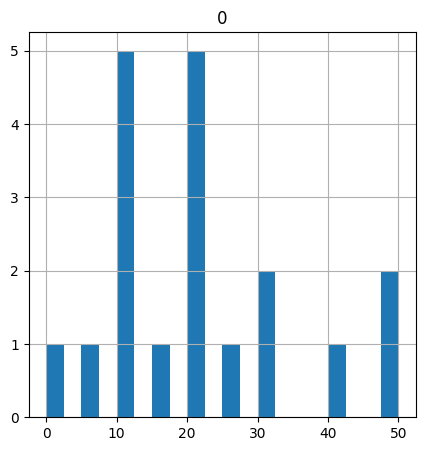

In [15]:
pd.DataFrame(x).hist(bins=20,range=(0,50),figsize=(5,5))
print(stats.skew(data))

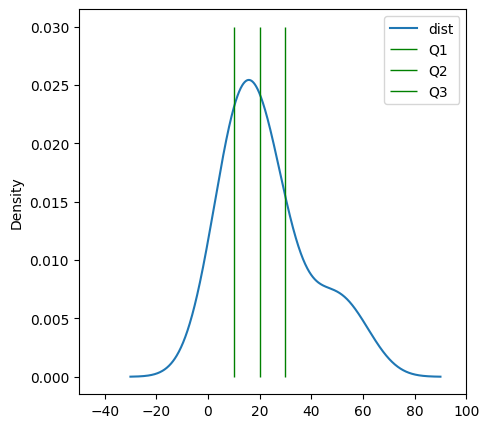

In [39]:
pd.DataFrame(x).plot(kind="density",figsize=(5,5),xlim=(-50,100))
plt.vlines(ymin=0,ymax=0.03,x=Q1,linewidth=1.0,color="green")
plt.vlines(ymin=0,ymax=0.03,x=Q2,linewidth=1.0,color="green")
plt.vlines(ymin=0,ymax=0.03,x=Q3,linewidth=1.0,color="green")
plt.legend(["dist","Q1","Q2","Q3"])


<AxesSubplot: ylabel='Density'>

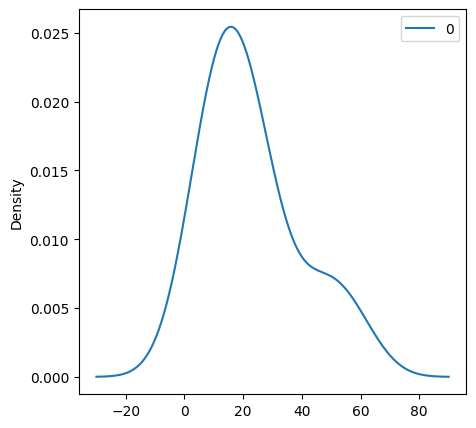

In [17]:
pd.DataFrame(x).plot(kind="density",figsize=(5,5))

In [18]:
#pd.DataFrame(x).plot(kind="pie",subplots=True,figsize=(10,10))
#plt.legend(["$30","$20","$15","$10","$10","$60","$20","$25","$20","$30","$10","$5","$50","$40","$20","$10","$100","$0","$20","$50"])

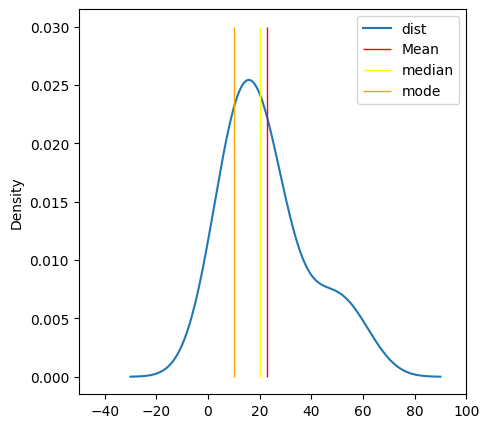

In [19]:
pd.DataFrame(x).plot(kind="kde",figsize=(5,5),xlim=(-50,100))
#a=range(-50,100)
plt.vlines(ymin=0,ymax=0.03,x=mean,linewidth=1.0,color="red")
plt.vlines(ymin=0,ymax=0.03,x=median,linewidth=1.0,color="yellow")
plt.vlines(ymin=0,ymax=0.03,x=mode[0],linewidth=1.0,color="orange")
plt.legend(["dist","Mean","median","mode"])

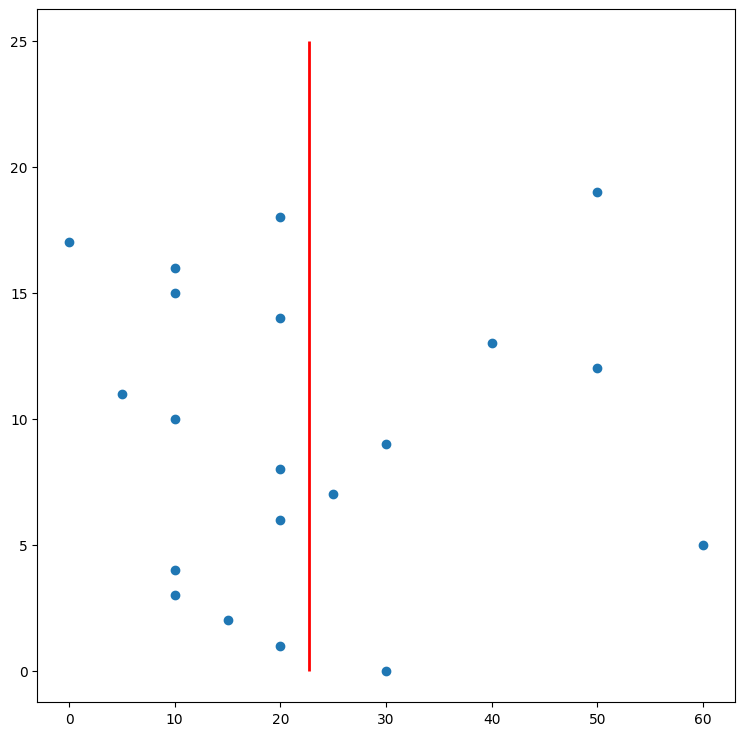

In [20]:
plt.figure(figsize=(9,9))
y=range(20)
plt.errorbar(x=x,y=y,fmt="o")
plt.vlines(ymin=0,ymax=25,x=mean,linewidth=2.0,color="red")
